# Exam 02

**I affirm that I have upheld the highest principles of honesty and integrity in my academic work and have not witnessed a violation of the Honor Code.**

### your signature here:
Quan Nguyen


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6.47,4)
plt.style.use('seaborn')
import matplotlib.cm as cm
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("talk")
np.random.seed(0)
#-----------------------------
# Natural Language Toolkit 
import nltk
nltk.download('punkt') #word tokenizer
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, WordPunctTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import requests 
import string 
import re
#-----------------------------
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import time
#-----------------------------
from urllib.request import urlretrieve
#-----------------------------
import tensorflow as tf
tf.random.set_seed(0)
#-----------------------------

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Notes
* Problems 1-2 are short answer.  Please include full reasoning behind each answer.
* Problem 3: handwritten greek letter classifier.  Write code that will classify the characters.
* Problem 4: who wrote it.  Determine which test class belongs with which training class.  

#### Note: Please complete each problem (3-4) first without regard to accuracy.  While there is an accuracy requirement for problem 3,  this is the threshold for full credit and substantial partial credit will be given provided your work is well-commented and follows what we have done in class.  Problem 4 has no explicit accuracy threshold for credit.   

#### For all problems, comment on your results.



# Problem 1:

Consider the following schema for planetary database:
* planets(pid, planet_name, number_of_moons, length_of_year)
* spacecraft(sid, craft_name, year, pid)

For the spacecraft, the pid matches the destination planet.
* length_of_day (in days):  the rotation of a planet spinning on its axis (for Earth: length_of_day	= 1 day)
* length_of_year (in years): the revolution of a planet around the sun (for Earth: length_of_year	= 1 year)


### Planets table
| pid | planet_name	| number_of_moons	| length_of_day	| length_of_year | 
| - | - | - |- | - |
| 1 |Mercury	|0|	58 |	0.24|
| 2 |Venus	|0|	243 | 0.62|
| 3 |Earth	|1|	0.99|	1|
| 4 |Mars| 2 | 1.03 |1.88 |
| 5 |Jupiter	| 53| 0.43  	|11.86|
| 6 |Saturn	| 53	|0.45	|29.46|
| 7 | Uranus | 27 | 0.72 | 84.01 | 
| 8 | Neptune | 14 | 0.67 | 164.79 | 


### Planetary Spacecraft
You should also make a table for the planetary spacecraft.


| sid | craft_name    | year | pid    |
| - |- | - |- | 
| 101 | Mariner 10 | 1974 | 1 |
| 102 | Mariner 2  | 1962 | 2 |
| 103 | Venera 9   | 1975 | 2 |
| 104 | Magellan   | 1989 | 2 |
| 105 | Mariner 9  | 1971 | 4 |
| 106 | Viking     | 1976 | 4 |
| 107 | Pioneer 10 | 1973 | 5 | 
| 108 | Galileo    | 1995 | 5 | 
| 109 | Cassini    | 1997 | 6 |



### The SQL database can be found at : 
[http://public.gettysburg.edu/~jpuckett/ds325/exam02/planets.db](http://public.gettysburg.edu/~jpuckett/ds325/exam02/planets.db)


### For the following questions, provide your 
* query
* query result 

### Questions:
1) Which planet has the most moons?

2) Which planets has the longest day?

3) Which spacecraft(s) that were sent to Jupiter?

4) Which spacecraft(s) visited planets with no moons?



### Your answers here:
1) Which planet has the most moons?
* query
  SELECT *
  FROM planets
  order by number_of_moons DESC
  LIMIT 1

* result
  Jupiter and Saturn (53 moons)


2) Which planets has the longest day?
* query
  SELECT *
  FROM planets
  order by length_of_day DESC
  LIMIT 1

* result
  Venus (243)

3) Which spacecraft(s) that were sent to Jupiter?
* query
  SELECT craft_name
  from spacecraft
  left join planets
  on spacecraft.pid = planets.pid
  where planets.planet_name = 'Jupiter'

* result
  Pioneer 10, Galileo

4) Which spacecraft(s) visited planets with no moons?
* query
  SELECT craft_name
  from spacecraft
  left join planets
  on spacecraft.pid = planets.pid
  where planets.number_of_moons = 0

* result
  Mariner 10, Mariner 2, Venera 9, Magellan


# Problem 2:

1) Name three advantages for SeLU activation function over ReLU.

2) Suppose we have a 4 × 4 input that looks like this:

$$
A = \begin{pmatrix}
1 & 2 & 1 & 1 \\
0 & 6 & 1 & 1 \\
1 & 4 & 1 & 0 \\
1 & 1 & 8 & 0 
\end{pmatrix}
$$

$$
k = \dfrac{1}{5} \begin{pmatrix}
0 & 1 & 0  \\
1 & 1 & 1  \\
0 & 1 & 0
\end{pmatrix}
$$

#### Apply the 3 × 3 convolutional kernel $k$  to the input A (above). 
* Use a stride of 1 when convolving.
* Use a zero-padding of 1. 
* Do not apply the ReLU activation or any pooling. 
* Show your work (e.g. the multiplications and additions).




### Your answers here
1) Name three advantages for SeLU activation function over ReLU.

    a) Internal normalization is faster than external normalization, which means the network converges faster
    b) Comparing to ReLU, the model may converge faster when uses SeLU since it has negative values which allows the system to have the average output of 0.
    c) Comparing to ReLU, SELU cannot die since it always has a nonzero derivative
    d) SeLU activation function induces self-normalizing, which solves the vanishing/exploding gradients problem and enables deep neural network

2) Apply the 3 × 3 convolutional kernel $k$  to the input A (above).

# Problem 3: handwritten greek letter classifier

In this problem, you will construct a Neural Net classifier to distinguish handwritten greek letters.  For full credit, your model will achieve **>95%** on the Test dataset using **fewer than 500k parameters** while training for only 10 epochs.  

### The target accuracy is **>95%**
* Note that this is the target accuracy.  Accuracies below will will get partial credit proportional to how close they are to this target.

### You MUST use the following:
* **Epochs = 10**
* Nadam, as the optimizer, you may change the **learning rate**, but there is no need to change (beta_1=0.9, beta_2=0.999, epsilon=1e-07)
<code>
    opt            = tf.keras.optimizers.Nadam(learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Nadam')
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
</code>
* Choose a seed for your model, this is so that your work is reproducible. When building the model, use 
<code>
    tf.random.set_seed(0)
    np.random.seed(0)
</code>

### Your model MUST have < 500k parameters.
* If you go over, your model will not be accepted.
* You will use the following code to verify the number of parameters.
<code>
    model.summary()
</code>

### You may use ANY of the following:
* Any activation function, batch size, and dropout.
* Any convolutional filter size and number of convolutional filters.
* As many Conv2D and Dense layers as desired.


### What is Not allowed
* Transfer learning
* Data Augmentation 


In [2]:
def loadGreek():
    import io
    web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/exam02/'
    filename = web_addr+'exam02-greek.npz'
    response = requests.get(filename)
    response.raise_for_status()
    #
    data = np.load(io.BytesIO(response.content))
    X_train = data['X_train']
    y_train = data['y_train']
    X_test  = data['X_test']
    y_test  = data['y_test']    
    return X_train,y_train,X_test,y_test

### 1. Show 1 image from each class in an (3 row x 8 column) grid

<Figure size 432x288 with 0 Axes>

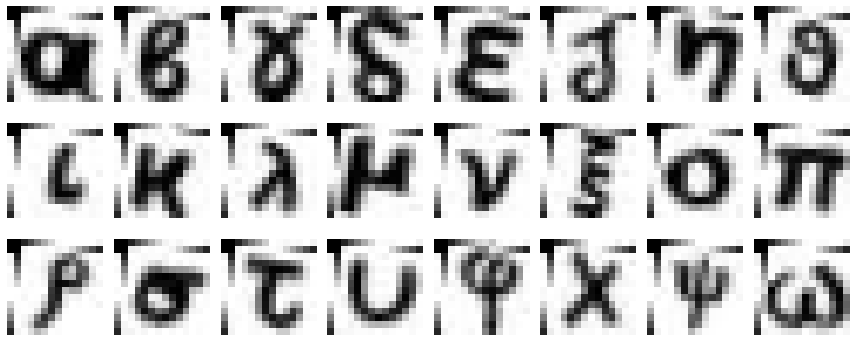

In [3]:
# your answer here
X_train,y_train,X_test,y_test = loadGreek()

fig=plt.figure()
ncols,nrows = 8, 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,figsize=(12,5))
input_shape= (X_train.shape[1],X_train.shape[2])
for i in range(nrows):
  for j in range(ncols):
    idx = (i * 8) + j
    Xi  = X_train[y_train == idx]
    imgi = Xi[0].reshape((input_shape[0],input_shape[1]))
    axs[i,j].imshow(imgi,interpolation='nearest',cmap=plt.cm.gray)
    axs[i,j].axis('off')
plt.tight_layout()
fig.subplots_adjust(hspace=.1)
plt.show()

### 2.  Build and train the Greek letter classifier

In [4]:
def printAccuracy(history,results_test):
    print("train loss %.5f \t train acc: %.5f"%(history.history['loss'][-1],history.history['accuracy'][-1]))
    print("valid loss %.5f \t valid acc: %.5f"%(history.history['val_loss'][-1],history.history['val_accuracy'][-1]))
    print("test loss  %.5f \t test acc:  %.5f"%(results_test[0],results_test[1]))

def plot_result(history,results_test):
    # Get training and validation histories
    training_acc = history.history['accuracy']
    val_acc      = history.history['val_accuracy']
    # Create count of the number of epochs
    epoch_count = range(1, len(training_acc) + 1)
    # Visualize loss history
    plt.plot(epoch_count, training_acc, 'b-o',label='Training')
    plt.plot(epoch_count, val_acc, 'r--',label='Validation')
    plt.plot(epoch_count, results_test[1]*np.ones(len(epoch_count)),'k--',label='Test')
    plt.legend()
    plt.title("Training and validation accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
  
def load_data():
  X_train,y_train,X_test,y_test = loadGreek()

  num_classes = 24
  input_shape = (X_train.shape[1],X_train.shape[2])
  #normalize the data between 0-1
  X_train = X_train.astype('float32') / 255
  X_test  = X_test.astype( 'float32') / 255
  #Reshape To Match The tf.keras's Expectations for CNNs
  X_train = X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1],1)
  X_test  = X_test.reshape( X_test.shape[0],  input_shape[0], input_shape[1],1)
  #one hot encoding
  Y_train = tf.keras.utils.to_categorical(y_train, num_classes)
  Y_test  = tf.keras.utils.to_categorical(y_test,  num_classes)

  return X_train,Y_train,X_test,Y_test

In [5]:
X_train,Y_train,X_test,Y_test = load_data()

#### build model with hyperparamters

In [6]:
# your answer here
def run_model(batch_size=10, alpha=0.001, drop_rate=0.2, conv_acti='relu', hid_acti='relu', conv_stride=1, pool_stride=1):
  np.random.seed(0)
  
  my_model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(8, kernel_size=2, strides=conv_stride,  activation=conv_acti, input_shape=X_train[0].shape, padding='same'), #C1
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=pool_stride, padding='valid'), #S2
      tf.keras.layers.Conv2D(16, kernel_size=2, strides=conv_stride, activation=conv_acti, padding='valid'), #C3
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=pool_stride, padding='valid'), #S4
      # tf.keras.layers.Conv2D(32, kernel_size=2, strides=1, activation='relu', padding='valid'), #C5
      tf.keras.layers.Flatten(), #Flatten
      tf.keras.layers.Dropout(drop_rate),
      tf.keras.layers.Dense(128, activation=hid_acti),
      tf.keras.layers.Dropout(drop_rate),
      tf.keras.layers.Dense(64, activation=hid_acti),
      tf.keras.layers.Dropout(drop_rate),
      tf.keras.layers.Dense(24, activation='softmax') #Output layer
  ])

  # optimizer
  opt = tf.keras.optimizers.Nadam(learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Nadam')
  my_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

  #train model here
  tstart   = tf.timestamp()
  my_history = my_model.fit(X_train, Y_train, verbose=1,
                      epochs=10,
                      batch_size=batch_size,
                      validation_split = 0.2) 
  total_time = tf.timestamp() - tstart
  print("total time %3.3f seconds"%total_time)


  return my_model, my_history

In [7]:
# your answer here
result = run_model()

Epoch 1/10
692/692 [==============================] - 13s 15ms/step - loss: 1.8520 - accuracy: 0.4171 - val_loss: 0.9643 - val_accuracy: 0.6881
Epoch 2/10
692/692 [==============================] - 7s 10ms/step - loss: 0.6177 - accuracy: 0.7988 - val_loss: 0.4575 - val_accuracy: 0.8484
Epoch 3/10
692/692 [==============================] - 6s 8ms/step - loss: 0.3325 - accuracy: 0.8861 - val_loss: 0.3071 - val_accuracy: 0.9039
Epoch 4/10
692/692 [==============================] - 6s 8ms/step - loss: 0.2297 - accuracy: 0.9232 - val_loss: 0.1811 - val_accuracy: 0.9468
Epoch 5/10
692/692 [==============================] - 6s 8ms/step - loss: 0.1667 - accuracy: 0.9447 - val_loss: 0.1895 - val_accuracy: 0.9346
Epoch 6/10
692/692 [==============================] - 5s 8ms/step - loss: 0.1435 - accuracy: 0.9523 - val_loss: 0.1261 - val_accuracy: 0.9606
Epoch 7/10
692/692 [==============================] - 6s 8ms/step - loss: 0.1212 - accuracy: 0.9598 - val_loss: 0.1493 - val_accuracy: 0.9589
Epo

### 3. Print the model summary showing the number of parameters

In [8]:
print(result[0].summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1936)              0         
                                                                 
 dropout (Dropout)           (None, 1936)              0

### 4. Plot the training, validation and test accuracy.  
* In the title, include the Test accuracy (to 4 significan digits, XX.XX%)
* In the title, include the time to train the model

train loss 0.08344 	 train acc: 0.97092
valid loss 0.11235 	 valid acc: 0.96296
test loss  0.29743 	 test acc:  0.91377


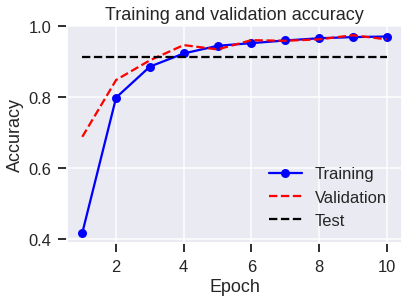

In [9]:
# your answer here
results_test = result[0].evaluate(X_test, Y_test, batch_size=128,verbose=0)
history = result[1]
printAccuracy(history, results_test)
plot_result(history, results_test)

#### Comment on your result

* The model earned higher accuracy with smaller kernel and smaller strides, which means that I tried my best to preserve the data. Although the number of parameters is much bigger than if I use bigger kernel or strides, that number is still in valid range
* The valid accuracy is a little fluctuated

# Problem 4: who wrote it 

Our training set consist of 6 test by the following authors and their works:

#### Training dataset
| class | Author | Novel |
| - | - | - | 
| 0 | 	Charlotte Brontë |	Villette	|
| 1	|	Fyodor Dostoyevsky	| Brothers Kamarazov	|
| 2	|	Victor Hugo	| Les Misérables	|
| 3	|	Mark Twain	| The Adventures of Tom Sawyer	 |


Unfortunately, the curator of this database, mixed-up the test classes so that they do not correspond to the training dataset.  So we'll use only be refering to the **test** dataset loosely as the class label don't match the **train** dataset.

#### Test dataset
| class | Author | Novel |
| - | - | - | 
| ? | 	Charlotte Brontë |	
| ?	|	Fyodor Dostoyevsky	|
| ?	|	Victor Hugo	| 
| ?	|	Mark Twain	| 

### Your goal is to build a classifier that will determine which of the training authors wrote a particular query sentence.  
0. Load the data.
1. Preprocess the train and test dataset.
2. Build the vectorizer and classifier.
3. Use model to predict the test classes.  
* For each test class label, predict the corresponding training class, make a histogram for each test class label.  Use this to determine which train class label corresponds to which test class label.
4. Make a 'whoSaidIt' function that can predict which of the four authors wrote query text (provided below). 

  * UPDATE: build a model and predict the test classes:
     For the training dataset, we know Bronte is labeled as class =0 and Hugo is class=2.  After you have built the classifier, your task is to determine which label of the test data belongs to which label of the train data.  That is, the labels of the test data are mixed up.  Training class =0 is not the same author as test class=0.  Your task is then to fix the mismatch.  For each test class, who is the author?  For test class =0, was it Bronte, Dostoyevsky, Hugo or Twain?




### 0. Load the data.

In [10]:
web_addr='http://public.gettysburg.edu/~jpuckett/ds325/exam02/'
df_train = pd.read_csv(web_addr+'exam02-corpus-train.csv.gz')
df_test  = pd.read_csv(web_addr+'exam02-corpus-test.csv.gz')
df_train.head(5)

,class,text
0,0,My godmother lived in a handsome house in the ...
1,0,Her husband’s family had been residents there ...
2,0,When I was a girl I went to Bretton about twic...
3,0,The house and its inmates specially suited me.
4,0,"The\r\nlarge peaceful rooms, the well-arranged..."


In [11]:
print(df_train.shape)
print(df_test.shape)

(14260, 2)
(17820, 2)


### 1. Pre-process the data

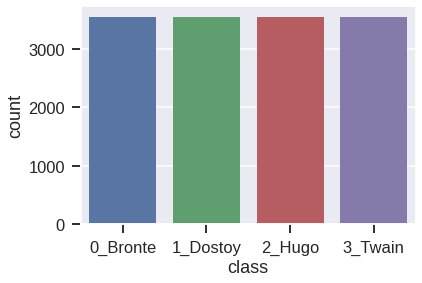

In [12]:
class_names = ['0_Bronte', '1_Dostoy','2_Hugo', '3_Twain']
ax = sns.countplot(x=df_train['class']); 
ax.set_xticklabels(class_names)
plt.show()

In [13]:
def clean_word(raw_text): #tokenize, lowercase, remove stopwords, remove punctuation, lemmatize
  #define function to convert raw text into tokens as detailed above
  stop_words     = set(nltk.corpus.stopwords.words('english'))
  stemmer        = nltk.stem.PorterStemmer()
  wnl            = nltk.WordNetLemmatizer()

  tokens         = nltk.tokenize.word_tokenize(raw_text)             # split into tokens
  tokens         = [ word.lower() for word in tokens ]               # to lower
  tokens         = [ w for w in tokens if not w in stop_words ]      # remove stop words
  tokens         = [ word for word in tokens if word.isalpha() ]     # remove not alphabetic
  tokens         = [ wnl.lemmatize ( t ) for t in tokens ]           # lemmatize
  text = " ".join(tokens)
  return text

In [14]:
df_train['clean']  = df_train.text.map(lambda x: clean_word(x)) #this may take a few minutes
df_train['length'] = df_train['text'].apply(len)

clean_text_0_Bronte = df_train[df_train['class']==0]
clean_text_1_Dostoy = df_train[df_train['class']==1]
clean_text_2_Hugo = df_train[df_train['class']==2]
clean_text_3_Twain = df_train[df_train['class']==3]

In [15]:
df_train.head(1)

,class,text,clean,length
0,0,My godmother lived in a handsome house in the ...,godmother lived handsome house clean ancient t...,81


In [16]:
clean_text_2_Hugo.head(1)

,class,text,clean,length
7130,2,"So long as there shall exist, by virtue of law...",long shall exist virtue law custom decree damn...,653


### 2. Build the vectorizer and classifier

In [17]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), #define our vectorizer
    ('clf', MultinomialNB()),      #define our classifier
])

#define parameters
parameters = {
    'tfidf__min_df': (0,   0.001),
    'tfidf__max_df': (0.5, 1.0),
    'tfidf__max_features': [1000, None],
    'tfidf__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
}

#use GridSearchCV
grid = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3);

In [18]:
start_time = time.time()
grid.fit(df_train['clean'], df_train['class']);
print("GridSearch took %3.2f seconds " % (time.time() - start_time))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
GridSearch took 17.41 seconds 


In [19]:
print("Best Score: ", grid.best_score_)
print("Best Params: ", grid.best_params_)
model = grid.best_estimator_  #should already be trained/fit



Best Score:  0.6561710554395112
Best Params:  {'tfidf__max_df': 0.5, 'tfidf__max_features': None, 'tfidf__min_df': 0, 'tfidf__ngram_range': (1, 2)}


### 3. Use model to predict the test classes
* Predict the class for each sentence individually.
* For each test class, make a histogram of the predicted classes to determine which test class belongs to which train class.
* Summarize your results in the table below.

In [20]:
test_0 = df_test[df_test['class']==0]
test_1 = df_test[df_test['class']==1]
test_2 = df_test[df_test['class']==2]
test_3 = df_test[df_test['class']==3]

In [21]:
df_test['predict']=model.predict(df_test['text'])

In [22]:
df_test.head()

,text,class,predict
0,You don't know about me without you have read ...,0,3
1,"That book was made\r\nby Mr. Mark Twain, and h...",0,0
2,"There was things\r\nwhich he stretched, but ma...",0,3
3,That is nothing.,0,2
4,I\r\nnever seen anybody but lied one time or a...,0,3


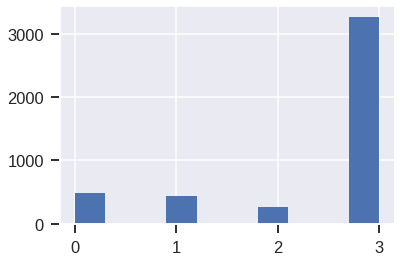

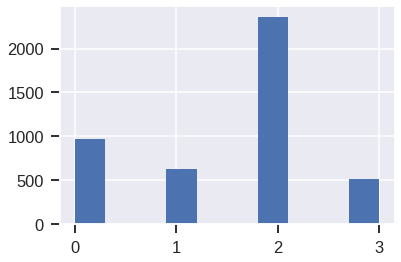

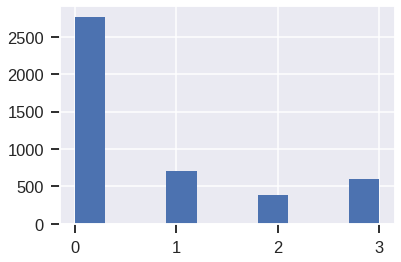

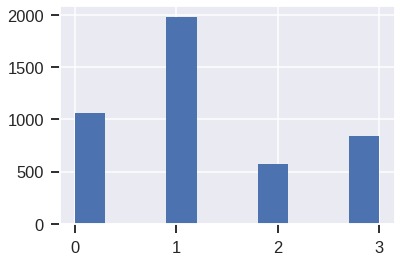

In [23]:
for i in range(4):
  result = df_test[df_test['class']==i]
  plt.hist(result['predict'])
  plt.show()

#### Complete the following table to summarize your results

| test_class_label | matched_train_label | Author |
| - | - | - | 
| 0 | 3 | Twain | 
| 1 | 2 | Hugo | 
| 2 | 0 | Bronte | 
| 3 | 1 | Dostoy | 




#### Comment on your result

* The best score of the gridsearch is quite lower than I expect, so I did not think it could be used to classify for the author matching problem. But it did better than that
* The result of matching problem is easy to recognise which author these sentenses belongs to